# HV Breakdown Strength Calculation with PyBoltz
#    (including attachment)

This notebook reproduces the calculation detailed in the paper "Dielectric Strength of Noble and Quenched Gases for High Pressure Time Projection Chambers"  by L. Norman, K. Silva, B.J.P. Jones, A.D. McDonald, M. R. Tiscareno and K. Woodruff

It can be used to calculate the HV breakdown strength of gases and mixtures according to PyBoltz-augmented Townsend or Meek criteria.

This calculation takes around 45 minutes ro run on a 2017 MacBook Pro.

In [61]:
import numpy as np
import pylab as plt
import time
from pathlib import Path
from scipy.optimize import minimize
import pandas as pd

from scipy import interpolate
from PyBoltz.PyBoltzRun import *

In [62]:
# Set up helper object
PBRun=PyBoltzRun()

# Show list of available gases
PBRun.ListGases()

CF4 1
ARGON 2
HELIUM4 3
HELIUM3 4
NEON 5
KRYPTON 6
XENON 7
CH4 8
ETHANE 9
PROPANE 10
ISOBUTANE 11
CO2 12
H2O 14
OXYGEN 15
NITROGEN 16
HYDROGEN 21
DEUTERIUM 22
DME 25


In [63]:
# Set the pressure 
p = 750.062

# Configure settings for our simulation - 
#  here you can pick your gas mix!
MySettings   ={'Gases'                 :['CO2'],
               'Fractions'             :[100],
               'Max_collisions'        :4e7,
               'EField_Vcm'            :100,
               'Max_electron_energy'   :0,
               'Temperature_C'         :23,
               'Pressure_Torr'         :p,
               'BField_Tesla'          :0,
               'BField_angle'          :0,
               'Angular_dist_model'    :2,
               'Enable_penning'        :0,
               'Enable_thermal_motion' :1,
               'ConsoleOutputFlag'     :0}

In [64]:
# Create empty lists to store outputs

TownsendAlpha=[]
Attachment=[]
TownsendAlpha_err=[]
Attachment_err=[]


In [65]:
# Run PyBoltz for each E field and extract ionization and attachment coefficients

EFields=np.logspace(3,6,40)
t1=time.time()
for E in EFields:
    print("Running with E Field " +str(E))

    MySettings['EField_Vcm']=E
    
    Output=PBRun.Run(MySettings)
    
    TownsendAlpha.append(Output['ReducedIonization'].val)
    TownsendAlpha_err.append(Output['ReducedIonization'].err)

 
    Attachment.append(Output['ReducedAttachment'].val)
    Attachment_err.append(Output['ReducedAttachment'].err)
    
t2=time.time()

print("Time elapsed:" +str(t2-t1))

Running with E Field 1000.0
Input Decor_Colls not set, using default 0
Input Decor_LookBacks not set, using default 0
Input Decor_Step not set, using default 0
Input NumSamples not set, using default 10

Running with E Field 1193.776641714437

Running with E Field 1425.1026703029977

Running with E Field 1701.2542798525892

Running with E Field 2030.9176209047348

Running with E Field 2424.462017082328

Running with E Field 2894.2661247167516

Running with E Field 3455.1072945922183

Running with E Field 4124.626382901352

Running with E Field 4923.882631706741

Running with E Field 5878.0160722749115

Running with E Field 7017.03828670383

Running with E Field 8376.776400682924

Running with E Field 10000.0

Running with E Field 11937.766417144358

Running with E Field 14251.026703029993

Running with E Field 17012.54279852589

Running with E Field 20309.17620904735

Running with E Field 24244.62017082331

Running with E Field 28942.661247167518

Running with E Field 34551.07294592218


Solution for Steady State Townsend parameters
Space step between sampling planes = 54.967365185172355 Microns

Simulation through 8 Space planes:
 Total number of Electrons:    94382.0
 Number of Negative Ions:     3395.0
 Number of primaries:        4.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0       12.0    137.9  219.1  444.4 1412.3   4.5      0.0         0.0        199.9    
   2.0       45.0    279.5  217.8 2137.3 1221.9   7.4     111.9       240.5       240.5    
   3.0      193.0    202.5  230.4  826.2 2175.6   5.7     323.5       264.9       264.9    
   4.0      655.0    220.1  221.5  951.9 2909.6   6.2     207.2       222.3       222.3    
   5.0      2109.0   209.6  220.4  861.4 2070.5   5.9     221.6       212.7       212.7    
   6.0      7221.0   210.9  219.6 1538.6 2484.2   6.0     222.8       223.9       223.9    
   7.0     24496.0   220.3  223.5 1623.


Solution for Steady State Townsend parameters
Space step between sampling planes = 15.37936257498275 Microns

Simulation through 8 Space planes:
 Total number of Electrons:   318028.0
 Number of Negative Ions:     2467.0
 Number of primaries:       22.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0       74.0    210.8  267.3 1029.4 2084.9   7.5      0.0         0.0        788.7    
   2.0      253.0    284.7  340.6 1458.3 1670.8   6.8     604.0       799.3       799.3    
   3.0      822.0    309.8  296.6 1614.0 2768.8   7.4     711.2       766.2       766.2    
   4.0      2524.0   284.3  312.7 1474.0 1442.6   7.4     785.2       729.5       729.5    
   5.0      8008.0   299.6  308.9 2157.9 1594.1   7.5     716.8       750.7       750.7    
   6.0     25578.0   293.3  319.1 1295.6 2213.4   7.4     768.9       755.1       755.1    
   7.0     81762.0   295.3  310.6 1033.3


Solution for Steady State Townsend parameters
Space step between sampling planes = 5.811329457509138 Microns

Simulation through 8 Space planes:
 Total number of Electrons:   861690.0
 Number of Negative Ions:     1592.0
 Number of primaries:      106.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0      303.0    365.4  397.3 1200.7 2224.3   9.4      0.0         0.0        1807.3   
   2.0      905.0    411.2  418.8 1066.8 1712.8   9.3     1679.7      1882.9      1882.9   
   3.0      2648.0   389.2  426.5 1888.1 2070.4   9.3     1942.0      1847.5      1847.5   
   4.0      7862.0   403.6  449.9 1689.4 2412.4   9.5     1810.0      1872.6      1872.6   
   5.0     23385.0   400.4  447.8 1572.4 2097.9   9.3     1889.3      1875.7      1875.7   
   6.0     69711.0   398.7  442.4 1668.9 2206.4   9.4     1886.8      1879.5      1879.5   
   7.0     206500.0  400.2  435.0 1298.0


Solution for Steady State Townsend parameters
Space step between sampling planes = 2.7663880533468985 Microns

Simulation through 8 Space planes:
 Total number of Electrons:  2011754.0
 Number of Negative Ions:      970.0
 Number of primaries:      323.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0      872.0    517.8  516.4 1449.6 2140.5  13.1      0.0         0.0        3590.0   
   2.0      2467.0   570.0  647.7 1764.6 2148.3  12.4     3412.2      3759.3      3759.3   
   3.0      6843.0   550.5  617.6 1430.4 2648.2  12.3     3813.5      3687.9      3687.9   
   4.0     19264.0   549.8  631.6 1676.3 2313.2  12.2     3746.4      3741.4      3741.4   
   5.0     54296.0   542.4  623.9 1927.5 1968.8  12.4     3794.6      3745.7      3745.7   
   6.0     152746.0  547.1  627.6 1651.2 2436.4  12.3     3707.5      3738.9      3738.9   
   7.0     428826.0  553.8  621.0 1809.


Solution for Steady State Townsend parameters
Space step between sampling planes = 1.6195664979147752 Microns

Simulation through 8 Space planes:
 Total number of Electrons:  4038829.0
 Number of Negative Ions:      485.0
 Number of primaries:      589.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0      1679.0   751.0  670.1 1061.8 2583.4  15.6      0.0         0.0        6467.9   
   2.0      4607.0   729.2  898.4 2666.0 2564.0  16.1     6410.3      6228.4      6232.4   
   3.0     12690.0   778.5  939.6 2211.6 3148.9  17.2     5848.9      6252.9      6256.2   
   4.0     34938.0   768.0  937.6 2116.5 2812.9  17.1     6338.8      6254.4      6253.3   
   5.0     96364.0   773.7  892.7 2053.9 2687.9  17.3     6220.0      6266.0      6264.4   
   6.0     264555.0  783.7  896.7 2243.2 2913.7  17.3     6156.4      6235.4      6235.7   
   7.0     728050.0  786.0  919.8 2287.


Solution for Steady State Townsend parameters
Space step between sampling planes = 1.1518236446903967 Microns

Simulation through 8 Space planes:
 Total number of Electrons:  7245459.0
 Number of Negative Ions:      274.0
 Number of primaries:      608.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0      1976.0  1155.0  845.9 1091.6 4164.0  26.5      0.0         0.0       10232.9   
   2.0      5477.0  1132.6 1251.3 2803.6 3808.7  26.4     8983.1      8813.4      8851.0   
   3.0     15883.0  1121.1 1292.3 2588.0 3723.5  25.8     9331.3      9242.3      9243.5   
   4.0     44676.0  1128.5 1266.8 2163.2 4037.2  26.1     8914.9      8971.9      8978.7   
   5.0     126627.0 1132.2 1302.9 2452.8 4004.9  26.1     9021.4      9049.8      9044.9   
   6.0     360058.0 1116.1 1282.1 2353.1 4214.0  26.0     9199.5      9075.6      9072.7   
   7.0    1022832.0 1120.6 1306.2 2850.

[]

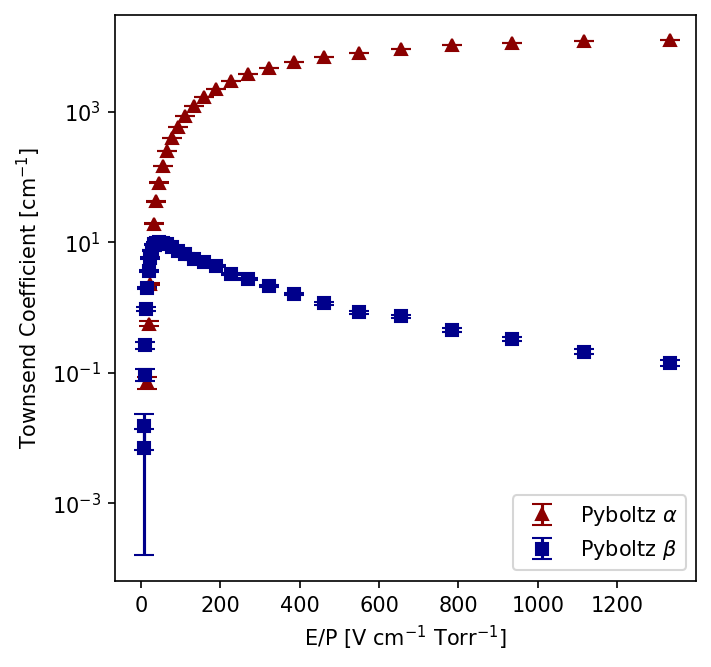

In [66]:
# Plot results of calculation

pylab.figure(figsize=(5,5),dpi=150)
pylab.errorbar(EFields/p,np.array(TownsendAlpha)*770/p,np.array(TownsendAlpha_err)*770/p,capsize=5,fmt='^',label=r'Pyboltz $\alpha$',color='DarkRed')
pylab.errorbar(EFields/p,np.array(Attachment)*770/p,np.array(Attachment_err)*770/p,capsize=5,fmt='s',label=r'Pyboltz $\beta$',color='DarkBlue')

pylab.legend(loc='lower right')
pylab.xlabel(r"E/P [V cm$^{-1}$ Torr$^{-1}$]")
pylab.ylabel(r"Townsend Coefficient [cm$^{-1}$]")
pylab.semilogy()

In [67]:
# Save the data to a text file

pressures=np.ones_like(EFields)*p
dat=pd.DataFrame(np.array([EFields,pressures, TownsendAlpha,TownsendAlpha_err,Attachment,Attachment_err]).transpose(),columns=['EField','Pressure','TownsendAlpha','TownsendAlpha_err','Attachment','Attachment_err'])


In [68]:
# Save data to fill
dat.to_csv("PyBoltz_CO2_1bar.csv")

In [69]:
# Read data from file (in case you want to plot without rerunning PyBoltz)
dat=pd.read_csv("PyBoltz_CO2_1bar.csv")

In [70]:
def SolveItWithAttachment(pds,alpha,beta, gamma=0.01):
    Vs=np.logspace(2,5.5,5000)
    subfun = lambda x: np.maximum(0.01,alpha(x)-beta(x))
    Solves=np.abs(subfun(Vs/pds)-(np.log(1+subfun(Vs/pds)/(alpha(Vs/pds)*gamma))/pds))
    SolvesNoAtt=np.abs(alpha(Vs/pds)-(np.log(1+1./gamma))/pds)
    minv=np.argmin(Solves)
    minvNoAtt=np.argmin(SolvesNoAtt)
    return [Vs[minv],Vs[minvNoAtt]]

def SolveOverAllPoints(pdsr,alpha,beta, gamma=0.01):
    VsReturn=[]
    for pds in pdsr:
        VsReturn.append(SolveItWithAttachment(pds,alpha,beta, gamma))
    VsReturn=np.array(VsReturn)
    return VsReturn

In [77]:
pdsr=np.logspace(-4,1,20)
alphafuncCO2=interpolate.interp1d(dat.EField,dat.TownsendAlpha,bounds_error=False,fill_value='extrapolate')
betafuncCO2=interpolate.interp1d(dat.EField,dat.Attachment,bounds_error=False,fill_value='extrapolate')
#alphafuncCO2=interpolate.interp1d(dat.EField,dat.TownsendAlpha,bounds_error=True)
#betafuncCO2=interpolate.interp1d(dat.EField,dat.Attachment,bounds_error=True)




<ipython-input-70-f5fcb3b5e7a0>:4: RuntimeWarning: divide by zero encountered in true_divide
  Solves=np.abs(subfun(Vs/pds)-(np.log(1+subfun(Vs/pds)/(alpha(Vs/pds)*gamma))/pds))


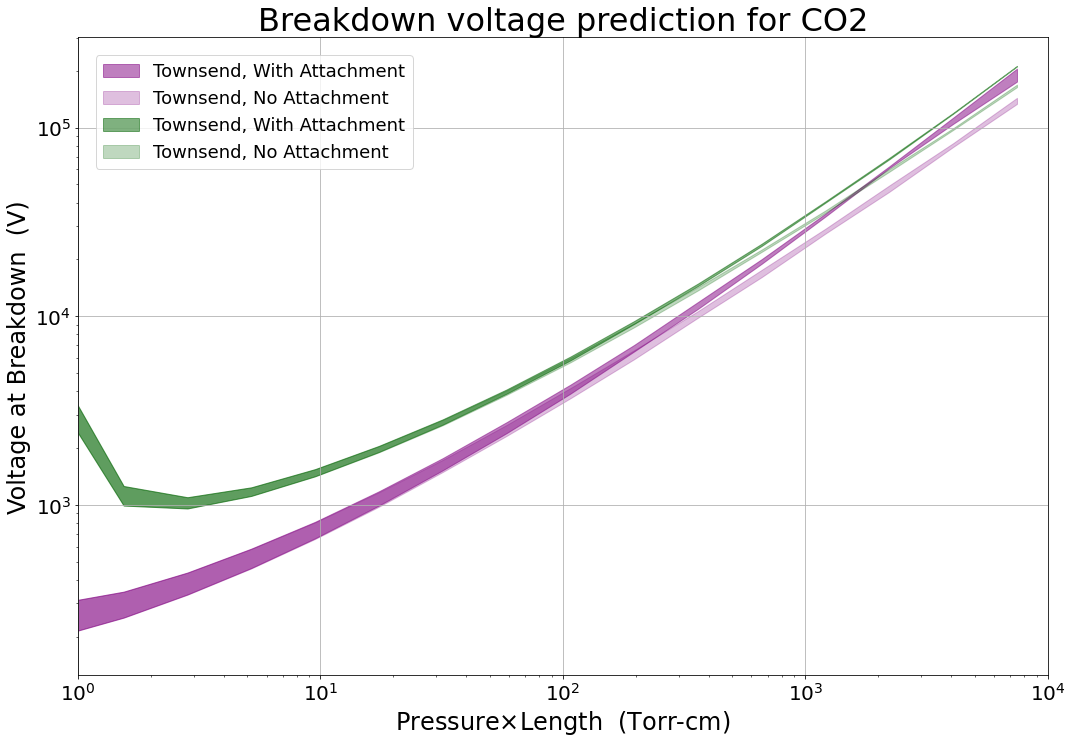

In [78]:
fig, ax = plt.subplots()



VsCO2_towns_hi=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, 0.033)[:,0]
VsCO2_towns_lo=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, 0.0033)[:,0]
VsCO2_towns_hi_noatt=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, 0.033)[:,1]
VsCO2_towns_lo_noatt=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, 0.0033)[:,1]

VsCO2_meek_hi=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, np.exp(-21))[:,0]
VsCO2_meek_lo=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, np.exp(-18))[:,0]
VsCO2_meek_hi_noatt=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, np.exp(-21))[:,1]
VsCO2_meek_lo_noatt=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, np.exp(-18))[:,1]


ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel(r'Pressure$\times$Length  (Torr-cm)', fontsize=24)
plt.ylabel('Voltage at Breakdown  (V)', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.fill_between(pdsr*p, VsCO2_towns_lo, VsCO2_towns_hi, color='purple',alpha=0.5,label='Townsend, With Attachment')
plt.fill_between(pdsr*p, VsCO2_towns_lo_noatt, VsCO2_towns_hi_noatt, color='purple',alpha=0.25,label='Townsend, No Attachment')
plt.fill_between(pdsr*p, VsCO2_meek_lo, VsCO2_meek_hi, color='DarkGreen',alpha=0.5,label='Townsend, With Attachment')
plt.fill_between(pdsr*p, VsCO2_meek_lo_noatt, VsCO2_meek_hi_noatt, color='DarkGreen',alpha=0.25,label='Townsend, No Attachment')
plt.xlim(1,1e4)

plt.grid()
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")

plt.tight_layout()
plt.title("Breakdown voltage prediction for CO2",fontsize=32)

plt.show()